## Non Farm Payroll Time Series

In [1]:
!pip install alpha_vantage
!pip install statsmodels
!pip install gluonts
!pip install mxnet

In [2]:
import os 
import numpy as np
import pandas as pd
from datetime import datetime
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint

In [3]:
from gluonts.dataset.common import ListDataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import mxnet as mx 

In [4]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'Mean Square Error is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'Mean Absolute Error is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'Root Mean Square Error is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'Mean Absolute Percentage Error is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 score is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') 

## NON-FARM PAYROLL

In [5]:
import requests
api_key = os.getenv('ALPHAVANTAGE_API_KEY')

In [6]:
url = f'https://www.alphavantage.co/query?function=NONFARM_PAYROLL&apikey={api_key}'
r = requests.get(url)

In [7]:
data = r.json()
print(data)

{'name': 'Total Nonfarm Payroll', 'interval': 'monthly', 'unit': 'thousands of persons', 'data': [{'date': '2022-03-01', 'value': '149938'}, {'date': '2022-02-01', 'value': '149144'}, {'date': '2022-01-01', 'value': '147505'}, {'date': '2021-12-01', 'value': '150352'}, {'date': '2021-11-01', 'value': '150210'}, {'date': '2021-10-01', 'value': '149310'}, {'date': '2021-09-01', 'value': '147651'}, {'date': '2021-08-01', 'value': '146947'}, {'date': '2021-07-01', 'value': '146452'}, {'date': '2021-06-01', 'value': '146493'}, {'date': '2021-05-01', 'value': '145304'}, {'date': '2021-04-01', 'value': '144358'}, {'date': '2021-03-01', 'value': '143308'}, {'date': '2021-02-01', 'value': '142129'}, {'date': '2021-01-01', 'value': '140974'}, {'date': '2020-12-01', 'value': '143605'}, {'date': '2020-11-01', 'value': '144115'}, {'date': '2020-10-01', 'value': '143565'}, {'date': '2020-09-01', 'value': '141958'}, {'date': '2020-08-01', 'value': '140727'}, {'date': '2020-07-01', 'value': '139105'},

In [8]:
df4 = pd.DataFrame(data['data'])
df4.head()

date   value
0  2022-03-01  149938
1  2022-02-01  149144
2  2022-01-01  147505
3  2021-12-01  150352
4  2021-11-01  150210

Make the time series ascending

In [9]:
df4 = df4[::-1] 
df4.head()

date  value
998  1939-01-01  29296
997  1939-02-01  29394
996  1939-03-01  29804
995  1939-04-01  29786
994  1939-05-01  30145

In [10]:
df4.date = pd.to_datetime(df4.date)
df4.value = df4.value.astype(int)

In [11]:
df4.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [12]:
df4.tail()

date   value
4 2021-11-01  150210
3 2021-12-01  150352
2 2022-01-01  147505
1 2022-02-01  149144
0 2022-03-01  149938

In [13]:
df4.shape

(999, 2)

In [14]:
df4 = df4.set_index('date')
df4

value
date              
1939-01-01   29296
1939-02-01   29394
1939-03-01   29804
1939-04-01   29786
1939-05-01   30145
...            ...
2021-11-01  150210
2021-12-01  150352
2022-01-01  147505
2022-02-01  149144
2022-03-01  149938

[999 rows x 1 columns]

In [15]:
df4.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='date', length=999, freq=None)

In [16]:
df4.columns = ['payroll']

In [17]:
df4.head()

payroll
date               
1939-01-01    29296
1939-02-01    29394
1939-03-01    29804
1939-04-01    29786
1939-05-01    30145

In [18]:
from datetime import datetime, timedelta
train_dataset_end = datetime(2020,12,31)
test_dataset_end = datetime(2022,3,1)

In [19]:
train_data = df4[:train_dataset_end]
test_data = df4[train_dataset_end+timedelta(days=0):test_dataset_end]

In [20]:
train_data.tail(2)

payroll
date               
2020-11-01   144115
2020-12-01   143605

In [21]:
test_data

payroll
date               
2021-01-01   140974
2021-02-01   142129
2021-03-01   143308
2021-04-01   144358
2021-05-01   145304
2021-06-01   146493
2021-07-01   146452
2021-08-01   146947
2021-09-01   147651
2021-10-01   149310
2021-11-01   150210
2021-12-01   150352
2022-01-01   147505
2022-02-01   149144
2022-03-01   149938

<AxesSubplot:xlabel='date'>

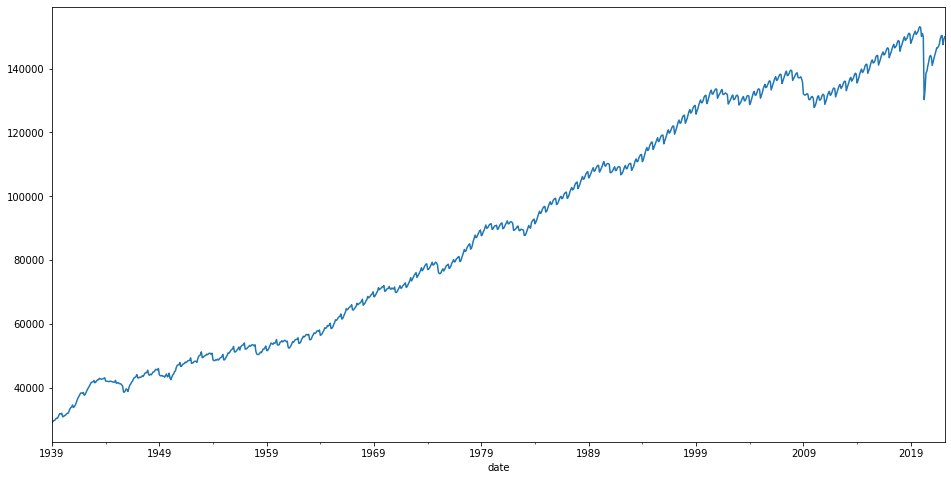

In [22]:
df4['payroll'].plot(figsize=(16,8))

In [23]:
df4['payroll differencing'] = df4['payroll'] - df4['payroll'].shift(1)  
df4['payroll second differencing'] = df4['payroll differencing'] - df4['payroll differencing'].shift(1) 

In [24]:
from statsmodels.tsa.stattools import adfuller 

In [25]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [26]:
adf_test(df4['payroll differencing'].dropna())

ADF Statistics: -8.287011667220165
p- value: 4.363161045869326e-13
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Differencing level = 1.  Integration d = 1 

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

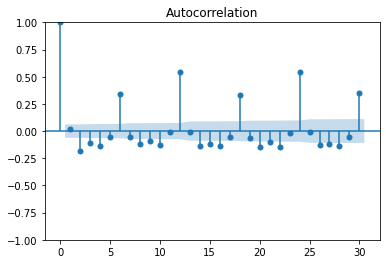

In [28]:
acf = plot_acf(df4['payroll differencing'].dropna())

MA q=30

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


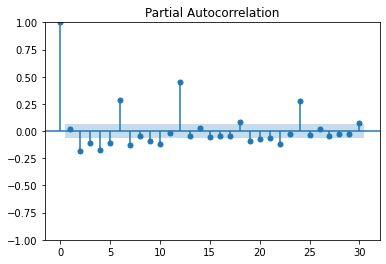

In [29]:
pacf = plot_pacf(df4['payroll differencing'].dropna())

AR p = 24

In [30]:
## create an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model_ARIMA = ARIMA(train_data['payroll'], order=(24,1,30)) # p,d,q
model_ARIMA_fit = model_ARIMA.fit()
model_ARIMA_fit.summary()

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                payroll   No. Observations:                  984
Model:               ARIMA(24, 1, 30)   Log Likelihood               -7939.046
Date:                Fri, 08 Apr 2022   AIC                          15988.093
Time:                        17:39:34   BIC                          16257.076
Sample:                    01-01-1939   HQIC                         16090.410
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0591      2.177      0.027      0.978      -4.208       4.326
ar.L2          0.0240      2.210      0.011      0.991      -4.307       4.355
ar.L3          0.1540      2.017      0.076      0.939      -3.800       4.108
ar.L4          0.0494      1.721      0.029      0.977      -3.323       3.422
ar.L5          0.0960      1.963      0.049      0.961      -3.752       3.944
ar.L6         -0.3118      1.626     -0.192      0.848      -3.499       2.875
ar.L7          0.0146      1.660      0.009      0.993      -3.240       3.269
ar.L8          0.0174      1.557      0.011      0.991      -3.035       3.069
ar.L9          0.0193      1.579      0.012      0.990      -3.075       3.114
ar.L10         0.0471      1.436      0.033      0.974      -2.768       2.862
ar.L11         0.0419      1.390      0.030      0.976      -2.682       2.765
ar.L12         0.2422      1.374      0.176      0.860      -2.450       2.935
ar.L13        -0.0923      1.993     -0.046      0.963      -3.999       3.814
ar.L14        -0.0255      2.074     -0.012      0.990      -4.090       4.039
ar.L15        -0.1183      1.899     -0.062      0.950      -3.841       3.604
ar.L16        -0.0496      1.655     -0.030      0.976      -3.293       3.194
ar.L17        -0.0813      1.879     -0.043      0.966      -3.764       3.602
ar.L18         0.3690      1.577      0.234      0.815      -2.723       3.461
ar.L19        -0.0131      1.593     -0.008      0.993      -3.135       3.109
ar.L20        -0.0354      1.518     -0.023      0.981      -3.011       2.940
ar.L21        -0.0560      1.491     -0.038      0.970      -2.978       2.866
ar.L22        -0.0493      1.397     -0.035      0.972      -2.787       2.688
ar.L23        -0.0477      1.352     -0.035      0.972      -2.698       2.603
ar.L24         0.6533      1.329      0.491      0.623      -1.952       3.259
ma.L1          0.0033      2.176      0.002      0.999      -4.261       4.267
ma.L2         -0.1168      2.120     -0.055      0.956      -4.273       4.039
ma.L3         -0.1657      1.924     -0.086      0.931      -3.937       3.605
ma.L4         -0.0752      1.597     -0.047      0.962      -3.205       3.054
ma.L5         -0.0905      1.923     -0.047      0.962      -3.859       3.678
ma.L6          0.3186      1.586      0.201      0.841      -2.791       3.428
ma.L7          0.0231      1.686      0.014      0.989      -3.281       3.327
ma.L8         -0.0336      1.532     -0.022      0.982      -3.036       2.969
ma.L9         -0.0281      1.534     -0.018      0.985      -3.034       2.978
ma.L10        -0.0418      1.395     -0.030      0.976      -2.776       2.692
ma.L11        -0.0192      1.375     -0.014      0.989      -2.714       2.676
ma.L12        -0.0885      1.409     -0.063      0.950      -2.850       2.673
ma.L13         0.0851      1.674      0.051      0.959      -3.196       3.366
ma.L14         0.0580      1.702      0.034      0.973      -3.278       3.394
ma

In [31]:
# prediction 
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-01-01 00:00:00
2022-03-01 00:00:00


In [32]:
pred=model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['payroll']-pred

In [33]:
pred

2021-01-01    141380.991203
2021-02-01    141876.039897
2021-03-01    141613.305082
2021-04-01    139156.322975
2021-05-01    140176.273076
2021-06-01    140862.382505
2021-07-01    139801.782507
2021-08-01    140914.105480
2021-09-01    142878.688131
2021-10-01    143435.427836
2021-11-01    142789.619585
2021-12-01    142377.679112
2022-01-01    141186.598666
2022-02-01    141668.347168
2022-03-01    141604.410020
Freq: MS, Name: predicted_mean, dtype: float64

In [34]:
residuals

date
2021-01-01    -406.991203
2021-02-01     252.960103
2021-03-01    1694.694918
2021-04-01    5201.677025
2021-05-01    5127.726924
2021-06-01    5630.617495
2021-07-01    6650.217493
2021-08-01    6032.894520
2021-09-01    4772.311869
2021-10-01    5874.572164
2021-11-01    7420.380415
2021-12-01    7974.320888
2022-01-01    6318.401334
2022-02-01    7475.652832
2022-03-01    8333.589980
dtype: float64

<AxesSubplot:ylabel='Density'>

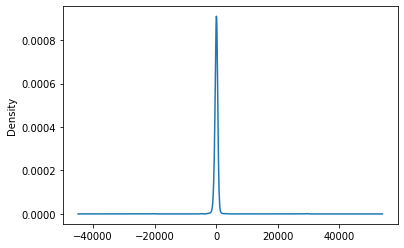

In [35]:
model_ARIMA_fit.resid.plot(kind='kde')

In [36]:
test_data['Predicted_ARIMA'] = pred

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_6382/284031954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


<AxesSubplot:xlabel='date'>

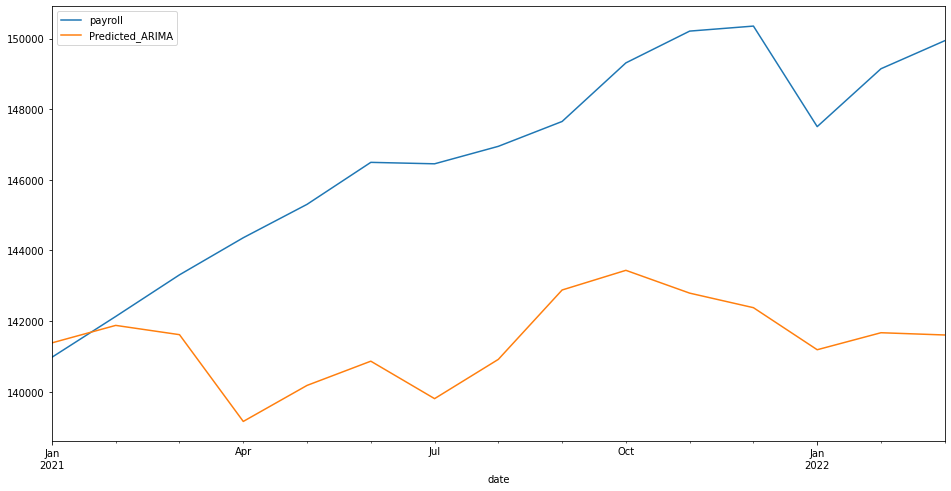

In [37]:
test_data[['payroll', 'Predicted_ARIMA']].plot(figsize=(16,8))

In [38]:
# create a SARIMAX model 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [40]:
df4['payroll yearly differencing'] = df4['payroll'] - df4['payroll'].shift(12) # yearly = 12 months  


In [43]:
adf_test(df4['payroll yearly differencing'].dropna())

ADF Statistics: -4.823703571212303
p- value: 4.898321247578596e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


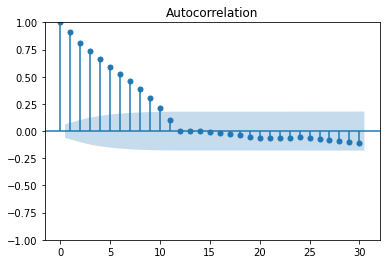

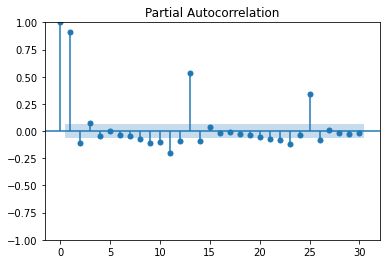

In [42]:
acf12 = plot_acf(df4['payroll yearly differencing'].dropna())
pacf12 = plot_pacf(df4['payroll yearly differencing'].dropna())

AR p=25,  MA q=9, I d=1

final value is order below is updated based on the p values to see the importance.

In [48]:
model_SARIMAX = SARIMAX(train_data['payroll'], order=(12,1,6), seasonal_order=(0,0,0,12))
model_SARIMAX_fit = model_SARIMAX.fit()
model_SARIMAX_fit.summary()

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.64008D+00    |proj g|=  1.23924D+00

At iterate    5    f=  8.13718D+00    |proj g|=  7.40869D-02

At iterate   10    f=  8.12346D+00    |proj g|=  1.78070D-02

At iterate   15    f=  8.11818D+00    |proj g|=  4.63581D-02

At iterate   20    f=  8.11567D+00    |proj g|=  4.17719D-02

At iterate   25    f=  8.11489D+00    |proj g|=  6.15778D-02

At iterate   30    f=  8.11434D+00    |proj g|=  2.78221D-02

At iterate   35    f=  8.11368D+00    |proj g|=  5.36461D-02

At iterate   40    f=  8.11317D+00    |proj g|=  4.28637D-02

At iterate   45    f=  8.11290D+00    |proj g|=  1.97947D-02

At iterate   50    f=  8.11262D+00    |proj g|=  1.03514D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                payroll   No. Observations:                  984
Model:              SARIMAX(12, 1, 6)   Log Likelihood               -7982.820
Date:                Fri, 08 Apr 2022   AIC                          16003.640
Time:                        17:46:08   BIC                          16096.562
Sample:                    01-01-1939   HQIC                         16038.986
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0055      0.050     -0.111      0.912      -0.103       0.092
ar.L2         -0.0907      0.088     -1.025      0.305      -0.264       0.083
ar.L3          0.0786      0.079      0.992      0.321      -0.077       0.234
ar.L4         -0.1092      0.096     -1.132      0.258      -0.298       0.080
ar.L5         -0.1313      0.083     -1.587      0.113      -0.294       0.031
ar.L6          0.4929      0.048     10.350      0.000       0.400       0.586
ar.L7         -0.0469      0.025     -1.842      0.065      -0.097       0.003
ar.L8          0.0506      0.052      0.968      0.333      -0.052       0.153
ar.L9         -0.0868      0.039     -2.253      0.024      -0.162      -0.011
ar.L10         0.0509      0.064      0.793      0.428      -0.075       0.177
ar.L11         0.0644      0.063      1.025      0.305      -0.059       0.188
ar.L12         0.3832      0.020     18.962      0.000       0.344       0.423
ma.L1          0.0789      0.047      1.663      0.096      -0.014       0.172
ma.L2          0.0141      0.089      0.159      0.873      -0.159       0.188
ma.L3         -0.0836      0.080     -1.049      0.294      -0.240       0.073
ma.L4          0.0953      0.093      1.028      0.304      -0.086       0.277
ma.L5          0.1380      0.084      1.647      0.100      -0.026       0.302
ma.L6         -0.6018      0.047    -12.730      0.000      -0.694      -0.509
sigma2      5.468e+05   6679.211     81.866      0.000    5.34e+05     5.6e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):           6927804.66
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.95   Skew:                           -16.55
Prob(H) (two-sided):                  0.00   Kurtosis:                       412.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
pred_SARIMAX = model_SARIMAX_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['payroll'] - pred_SARIMAX

<AxesSubplot:xlabel='date'>

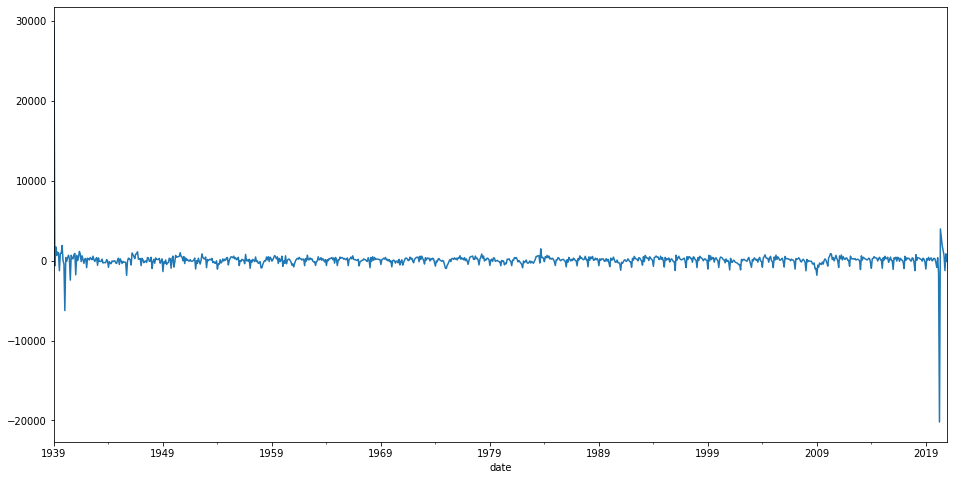

In [51]:
model_SARIMAX_fit.resid.plot(figsize=(16,8))

<AxesSubplot:ylabel='Density'>

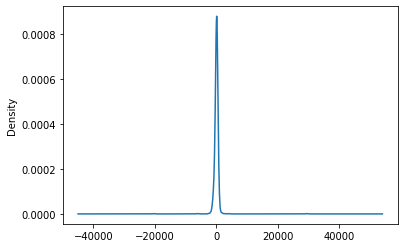

In [52]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [53]:
test_data['Predicted_SARIMAX'] = pred_SARIMAX

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_6382/1953269687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMAX'] = pred_SARIMAX


<AxesSubplot:xlabel='date'>

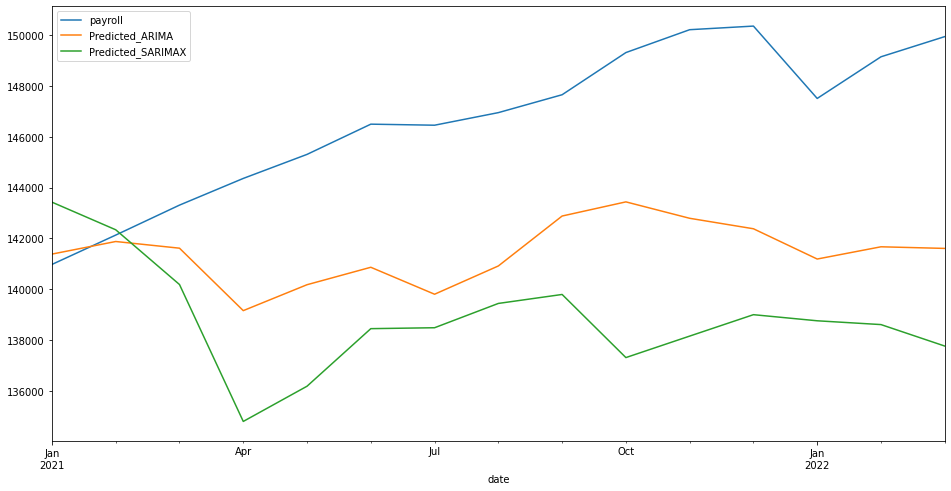

In [55]:
test_data[['payroll', 'Predicted_ARIMA', 'Predicted_SARIMAX']].plot(figsize=(16,8))

## Orbit - Damped Local Trend (DLP) model

In [56]:
!pip install orbit
!pip install orbit-ml

In [57]:
import orbit
from orbit.models.dlt import DLT
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [58]:
train_df = train_data[['payroll']].reset_index()

In [59]:
test_df = test_data[['payroll']].reset_index()

In [61]:
date_col = 'date'
response_col = 'payroll'

In [60]:
train_df.head()

date  payroll
0 1939-01-01    29296
1 1939-02-01    29394
2 1939-03-01    29804
3 1939-04-01    29786
4 1939-05-01    30145

In [62]:
# Define the DLT model
def createDLT(global_trend_option): 
  return DLT(
      response_col=response_col,
      date_col=date_col,
      seasonality=-1,
      estimator='stan-map',
      seed=8888,
      global_trend_option=global_trend_option, # linear, loglinear, flat, or logistic, 
      # for predicting uncertainty
      n_bootstrap_draws=1000,
  )

In [63]:
dlt_loglinear = createDLT('loglinear')
dlt_loglinear.fit(df=train_df)
predicted_df = dlt_loglinear.predict(df=test_df)

Initial log joint probability = -9322.61
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19      -7999.06      0.120519        1.9641      0.1983      0.1983       28   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      39      -7998.81      0.117458      0.137609      0.2824     0.02824       54   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      52      -7998.81       1.24371    0.00239056           1           1       86   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [64]:
predicted_df.head()

date   prediction_5     prediction  prediction_95
0 2021-01-01  142346.882472  143616.283104  144786.360562
1 2021-02-01  141629.060439  143625.309103  145441.092236
2 2021-03-01  141084.606295  143632.529418  145918.220123
3 2021-04-01  140611.153930  143638.305186  146180.202269
4 2021-05-01  140312.161139  143642.925315  146452.005301

In [65]:
prediction = predicted_df[['date', 'prediction']].set_index('date')
prediction.head()

prediction
date                     
2021-01-01  143616.283104
2021-02-01  143625.309103
2021-03-01  143632.529418
2021-04-01  143638.305186
2021-05-01  143642.925315

In [66]:
test_data['Predicted_DLT_LogLinear'] = prediction

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_6382/540110592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_DLT_LogLinear'] = prediction


In [67]:
test_data

payroll  Predicted_ARIMA  Predicted_SARIMAX  \
date                                                      
2021-01-01   140974    141380.991203      143424.390228   
2021-02-01   142129    141876.039897      142337.578707   
2021-03-01   143308    141613.305082      140183.542569   
2021-04-01   144358    139156.322975      134796.803785   
2021-05-01   145304    140176.273076      136182.486105   
2021-06-01   146493    140862.382505      138447.330630   
2021-07-01   146452    139801.782507      138483.517158   
2021-08-01   146947    140914.105480      139439.651121   
2021-09-01   147651    142878.688131      139792.662730   
2021-10-01   149310    143435.427836      137309.415482   
2021-11-01   150210    142789.619585      138154.557927   
2021-12-01   150352    142377.679112      138997.049248   
2022-01-01   147505    141186.598666      138756.728259   
2022-02-01   149144    141668.347168      138607.298866   
2022-03-01   149938    141604.410020      137762.522029   

            Predicted_DLT_LogLinear  
date                                 
2021-01-01            143616.283104  
2021-02-01            143625.309103  
2021-03-01            143632.529418  
2021-04-01            143638.305186  
2021-05-01            143642.925315  
2021-06-01            143646.620931  
2021-07-01            143649.576936  
2021-08-01            143651.941250  
2021-09-01            143653.832211  
2021-10-01            143655.344488  
2021-11-01            143656.553817  
2021-12-01            143657.520786  
2022-01-01            143658.293866  
2022-02-01            143658.911833  
2022-03-01            143659.405709

In [87]:
dlt_flat = createDLT('flat')
dlt_flat.fit(df=train_df)
predicted_df = dlt_flat.predict(df=test_df)

Initial log joint probability = -9324.08
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19      -8002.33      0.153454       4.11043      0.3289      0.3289       28   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      35      -8002.16       1.57157    0.00361678           1           1       55   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [88]:
prediction = predicted_df[['date', 'prediction']].set_index('date')
prediction.head()

prediction
date                     
2021-01-01  143616.277552
2021-02-01  143625.299593
2021-03-01  143632.517226
2021-04-01  143638.291332
2021-05-01  143642.910617

In [89]:
test_data['Predicted_DLT_Flat'] = prediction

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_6382/2472618137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_DLT_Flat'] = prediction


In [90]:
test_data.head()

payroll  Predicted_ARIMA  Predicted_SARIMAX  \
date                                                      
2021-01-01   140974    141380.991203      143424.390228   
2021-02-01   142129    141876.039897      142337.578707   
2021-03-01   143308    141613.305082      140183.542569   
2021-04-01   144358    139156.322975      134796.803785   
2021-05-01   145304    140176.273076      136182.486105   

            Predicted_DLT_LogLinear  Predicted_DLT_Flat  
date                                                     
2021-01-01            143616.283104       143616.277552  
2021-02-01            143625.309103       143625.299593  
2021-03-01            143632.529418       143632.517226  
2021-04-01            143638.305186       143638.291332  
2021-05-01            143642.925315       143642.910617

<AxesSubplot:xlabel='date'>

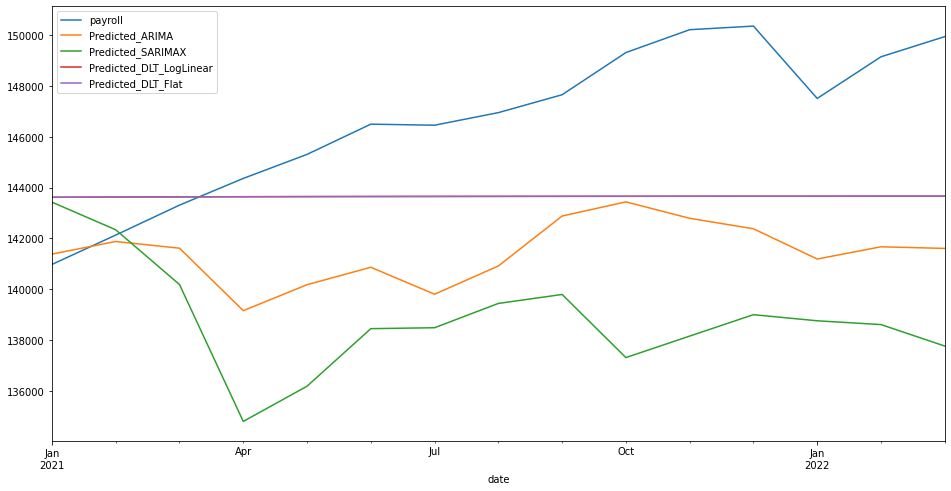

In [91]:
test_data[['payroll', 'Predicted_ARIMA', 'Predicted_SARIMAX', 
           'Predicted_DLT_LogLinear', 
           'Predicted_DLT_Flat'
           ]].plot(figsize=(16,8))

## Prophet

In [92]:
!pip install prophet

In [93]:
from prophet import Prophet

ERROR:prophet.plot:Importing plotly failed. Interactive plots will not work.


In [94]:
train_df.columns

Index(['date', 'payroll'], dtype='object')

In [95]:
proph_train = train_df.rename(columns={'date':'ds', 'payroll': 'y'})
proph_test = test_df.rename(columns={'date':'ds', 'payroll': 'y'})

In [96]:
proph_train.shape, proph_test.shape, train_df.shape, test_df.shape

((984, 2), (15, 2), (984, 2), (15, 2))

In [114]:
m = Prophet()
m.fit(proph_train)
future = m.make_future_dataframe(periods=len(proph_test), freq='MS')
forecast = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.96995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3492.72   0.000502634       563.245      0.5863      0.5863      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3514.33     0.0059865       336.737       1.347      0.1347      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3523.5     0.0269117       1888.54           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3532.19    0.00918287       921.692      0.2709           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3534.88     0.0127071       359.898           1           1      558   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [115]:
forecast.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 1939-01-01  31336.257946  27186.322999  32975.194952  31336.257946   
1 1939-02-01  31498.821284  27434.228233  33478.810130  31498.821284   
2 1939-03-01  31645.652686  27668.590966  33894.872139  31645.652686   
3 1939-04-01  31808.216024  28618.899049  34640.625378  31808.216024   
4 1939-05-01  31965.535384  29153.089419  35156.769954  31965.535384   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  31336.257946    -1282.383946          -1282.383946          -1282.383946   
1  31498.821284    -1101.993250          -1101.993250          -1101.993250   
2  31645.652686     -988.049449           -988.049449           -988.049449   
3  31808.216024     -260.841335           -260.841335           -260.841335   
4  31965.535384      178.031005            178.031005            178.031005   

        yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0 -1282.383946  -1282.383946  -1282.383946                   0.0   
1 -1101.993250  -1101.993250  -1101.993250                   0.0   
2  -988.049449   -988.049449   -988.049449                   0.0   
3  -260.841335   -260.841335   -260.841335                   0.0   
4   178.031005    178.031005    178.031005                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  30053.874000  
1                         0.0                         0.0  30396.828034  
2                         0.0                         0.0  30657.603237  
3                         0.0                         0.0  31547.374690  
4                         0.0                         0.0  32143.566389

In [116]:
forecast.tail()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
994 2021-11-01  147349.328127  144989.659409  151128.355384  147340.376884   
995 2021-12-01  147424.507065  145113.733362  151222.133138  147412.282510   
996 2022-01-01  147502.191967  143060.394449  149209.628726  147480.454874   
997 2022-02-01  147579.876869  143529.500203  149468.538161  147546.083014   
998 2022-03-01  147650.043878  143759.745897  149855.333632  147604.548204   

       trend_upper  additive_terms  additive_terms_lower  \
994  147361.061869      747.159664            747.159664   
995  147441.600354      784.610447            784.610447   
996  147525.851572    -1305.682340          -1305.682340   
997  147611.273782    -1133.185326          -1133.185326   
998  147689.660292     -796.753289           -796.753289   

     additive_terms_upper       yearly  yearly_lower  yearly_upper  \
994            747.159664   747.159664    747.159664    747.159664   
995            784.610447   784.610447    784.610447    784.610447   
996          -1305.682340 -1305.682340  -1305.682340  -1305.682340   
997          -1133.185326 -1133.185326  -1133.185326  -1133.185326   
998           -796.753289  -796.753289   -796.753289   -796.753289   

     multiplicative_terms  multiplicative_terms_lower  \
994                   0.0                         0.0   
995                   0.0                         0.0   
996                   0.0                         0.0   
997                   0.0                         0.0   
998                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
994                         0.0  148096.487791  
995                         0.0  148209.117512  
996                         0.0  146196.509627  
997                         0.0  146446.691544  
998                         0.0  146853.290589

In [117]:
test_data.tail()

payroll  Predicted_ARIMA  Predicted_SARIMAX  \
date                                                      
2021-11-01   150210    142789.619585      138154.557927   
2021-12-01   150352    142377.679112      138997.049248   
2022-01-01   147505    141186.598666      138756.728259   
2022-02-01   149144    141668.347168      138607.298866   
2022-03-01   149938    141604.410020      137762.522029   

            Predicted_DLT_LogLinear  Predicted_DLT_Flat  Predicted_Prophet  
date                                                                        
2021-11-01            143656.553817       143656.544086                NaN  
2021-12-01            143657.520786       143657.512821                NaN  
2022-01-01            143658.293866       143658.287808                NaN  
2022-02-01            143658.911833       143658.907798                NaN  
2022-03-01            143659.405709       143659.403790                NaN

In [118]:
len(test_data)

15

In [119]:
forecast[-15:].shape

(15, 16)

In [120]:
forecast.shape

(999, 16)

In [121]:
test_data.shape

(15, 6)

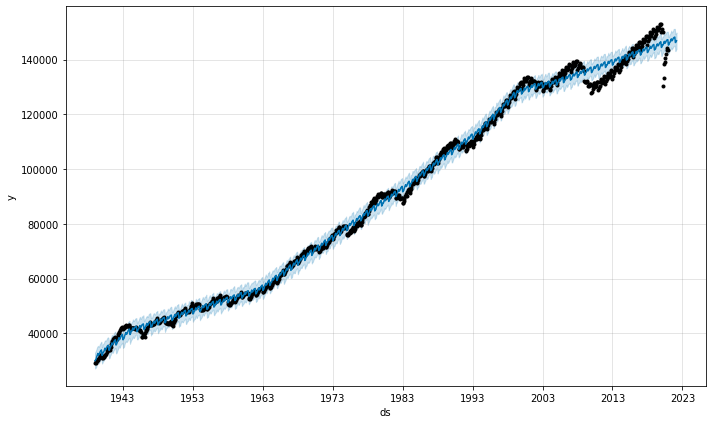

In [122]:
fig1 = m.plot(forecast)

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


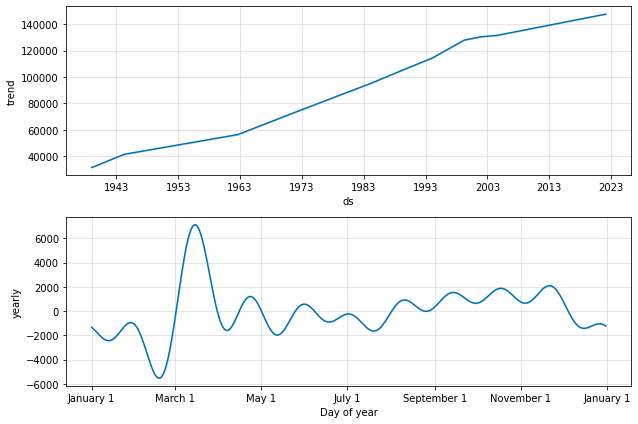

In [123]:
fig2 = m.plot_components(forecast)

In [124]:
test_data.index

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [125]:
df_tmp = forecast[-15:][['ds', 'yhat']].set_index('ds') 
df_tmp.index

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='ds', freq=None)

In [126]:
test_data['Predicted_Prophet'] = forecast[-15:][['ds', 'yhat']].set_index('ds')

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_6382/1555767056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Prophet'] = forecast[-15:][['ds', 'yhat']].set_index('ds')


In [127]:
test_data.head()

payroll  Predicted_ARIMA  Predicted_SARIMAX  \
date                                                      
2021-01-01   140974    141380.991203      143424.390228   
2021-02-01   142129    141876.039897      142337.578707   
2021-03-01   143308    141613.305082      140183.542569   
2021-04-01   144358    139156.322975      134796.803785   
2021-05-01   145304    140176.273076      136182.486105   

            Predicted_DLT_LogLinear  Predicted_DLT_Flat  Predicted_Prophet  
date                                                                        
2021-01-01            143616.283104       143616.277552      145257.673204  
2021-02-01            143625.309103       143625.299593      145498.086552  
2021-03-01            143632.529418       143632.517226      146131.743562  
2021-04-01            143638.305186       143638.291332      146350.271424  
2021-05-01            143642.925315       143642.910617      146940.656434

<AxesSubplot:xlabel='date'>

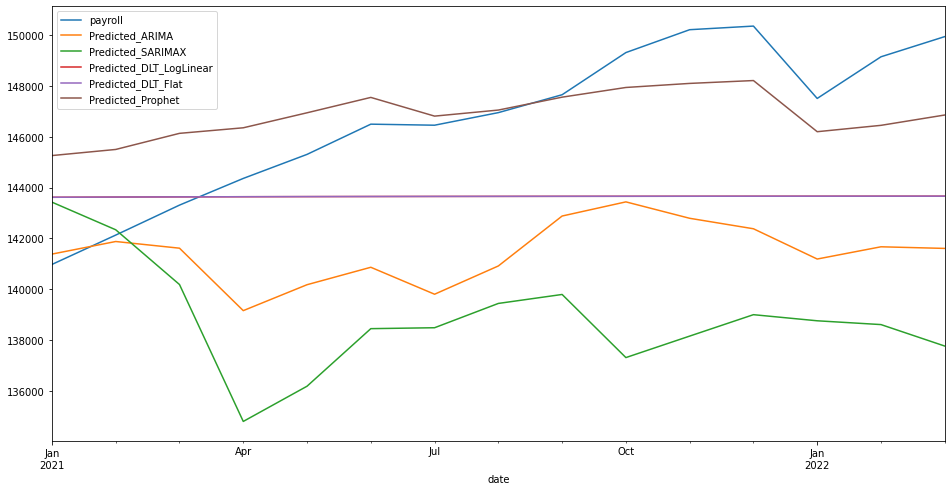

In [129]:
test_data[['payroll', 'Predicted_ARIMA', 'Predicted_SARIMAX', 'Predicted_DLT_LogLinear', 'Predicted_DLT_Flat', 
           'Predicted_Prophet'
           ]].plot(figsize=(16,8))

### DeepAR

In [130]:
df4.shape

(999, 4)

In [131]:
df4.tail()

payroll  payroll differencing  payroll second differencing  \
date                                                                     
2021-11-01   150210                 900.0                       -759.0   
2021-12-01   150352                 142.0                       -758.0   
2022-01-01   147505               -2847.0                      -2989.0   
2022-02-01   149144                1639.0                       4486.0   
2022-03-01   149938                 794.0                       -845.0   

            payroll yearly differencing  
date                                     
2021-11-01                       6095.0  
2021-12-01                       6747.0  
2022-01-01                       6531.0  
2022-02-01                       7015.0  
2022-03-01                       6630.0

In [132]:
df4.head()

payroll  payroll differencing  payroll second differencing  \
date                                                                     
1939-01-01    29296                   NaN                          NaN   
1939-02-01    29394                  98.0                          NaN   
1939-03-01    29804                 410.0                        312.0   
1939-04-01    29786                 -18.0                       -428.0   
1939-05-01    30145                 359.0                        377.0   

            payroll yearly differencing  
date                                     
1939-01-01                          NaN  
1939-02-01                          NaN  
1939-03-01                          NaN  
1939-04-01                          NaN  
1939-05-01                          NaN

In [133]:
train_data.head()

payroll
date               
1939-01-01    29296
1939-02-01    29394
1939-03-01    29804
1939-04-01    29786
1939-05-01    30145

In [135]:
start = pd.Timestamp("2021-01-01", freq="MS")
train_ds = ListDataset([{'target': train_data.payroll, 'start': start}], freq='MS')

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_6382/599257244.py:1: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  start = pd.Timestamp("2021-01-01", freq="MS")


Test dataset: use the whole dataset, add 'target' and 'start' field

In [137]:
test_ds = ListDataset([{'target': df4.payroll, 'start': start}], freq='MS')

In [147]:
np.random.seed(42)
mx.random.seed(42)

estimator = DeepAREstimator(
    prediction_length=15,
    context_length=15,
    freq='M',
    trainer=Trainer( # ctx="gpu",
                    epochs=25, learning_rate=1e-3, num_batches_per_epoch=100)
)
predictor = estimator.train(train_ds)

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/gluonts/transform/feature.py:343: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._freq_base = start.freq.base
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/gluonts/transform/feature.py:384: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  ..., i0 : i0 + length * start.freq.n : start.freq.n
INFO:gluonts.trainer:Start model training
INFO:gluonts.trainer:Epoch[0] Learning rate is 0.001
  0%|                                                                                              | 0/100 [00:00<?, ?it/s]/Users/wismineffendi/opt/anaconda3/envs/time

In [148]:
predictions = predictor.predict(test_ds)
predictions = list(predictions)[0]
predictions = predictions.quantile(0.5)

In [149]:
test_df.head()

date  payroll
0 2021-01-01   140974
1 2021-02-01   142129
2 2021-03-01   143308
3 2021-04-01   144358
4 2021-05-01   145304

In [150]:
pred_df = pd.DataFrame(predictions)
pred_df.columns = ['Pred_GDP']
pred_df

Pred_GDP
0   148810.812500
1   149324.453125
2   149588.312500
3   149234.390625
4   149405.281250
5   149322.203125
6   149222.062500
7   149092.000000
8   149122.421875
9   146050.875000
10  146592.671875
11  148835.484375
12  148100.375000
13  148751.281250
14  148524.265625

In [151]:
test_data['Predicted_DeepAR'] = pd.concat([test_df.date, pred_df], axis=1).set_index('date')

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_6382/2488335024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_DeepAR'] = pd.concat([test_df.date, pred_df], axis=1).set_index('date')


<AxesSubplot:xlabel='date'>

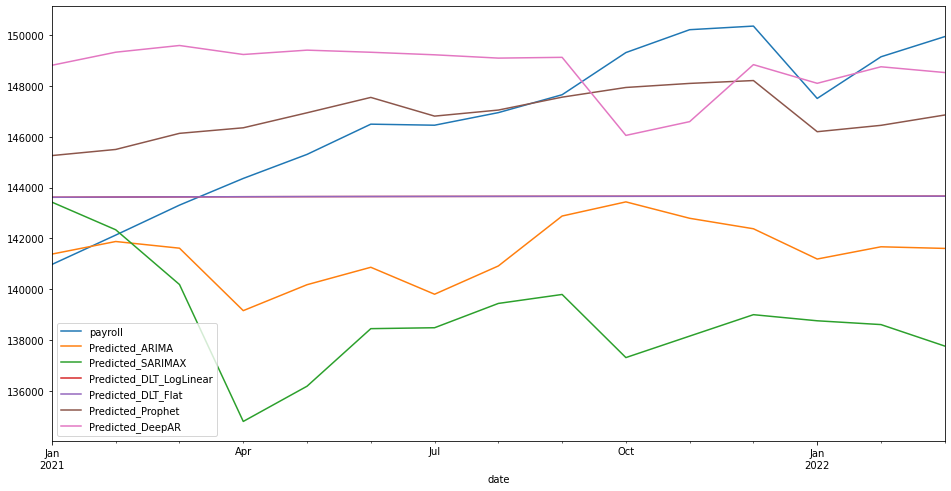

In [152]:
test_data[['payroll', 'Predicted_ARIMA', 'Predicted_SARIMAX', 'Predicted_DLT_LogLinear', 'Predicted_DLT_Flat', 
           'Predicted_Prophet', 'Predicted_DeepAR']].plot(figsize=(16,8))

## Metrics

In [153]:
timeseries_evaluation_metrics_func(test_data.payroll, test_data.Predicted_ARIMA)

Evaluation metric results:-
Mean Square Error is : 33998094.10707743
Mean Absolute Error is : 5277.800610801118
Root Mean Square Error is : 5830.788463585129
Mean Absolute Percentage Error is : 3.569054756474709
R2 score is : -3.137585230632448



In [154]:
timeseries_evaluation_metrics_func(test_data.payroll, test_data.Predicted_SARIMAX)

Evaluation metric results:-
Mean Square Error is : 79390074.5767417
Mean Absolute Error is : 8181.160201786146
Root Mean Square Error is : 8910.110806086628
Mean Absolute Percentage Error is : 5.537438958637773
R2 score is : -8.661812188441301



In [155]:
timeseries_evaluation_metrics_func(test_data.payroll, test_data.Predicted_DLT_LogLinear)

Evaluation metric results:-
Mean Square Error is : 17295745.710029177
Mean Absolute Error is : 3619.8592863075883
Root Mean Square Error is : 4158.815421490737
Mean Absolute Percentage Error is : 2.445129721904344
R2 score is : -1.104900991720414



In [156]:
timeseries_evaluation_metrics_func(test_data.payroll, test_data.Predicted_DLT_Flat)

Evaluation metric results:-
Mean Square Error is : 17295801.632955715
Mean Absolute Error is : 3619.865835521306
Root Mean Square Error is : 4158.82214490542
Mean Absolute Percentage Error is : 2.445134128429589
R2 score is : -1.104907797568829



In [157]:
timeseries_evaluation_metrics_func(test_data.payroll, test_data.Predicted_Prophet)

Evaluation metric results:-
Mean Square Error is : 5001673.528437636
Mean Absolute Error is : 1895.5003955806392
Root Mean Square Error is : 2236.442158527163
Mean Absolute Percentage Error is : 1.2991429762838507
R2 score is : 0.39129380445473927



In [158]:
timeseries_evaluation_metrics_func(test_data.payroll, test_data.Predicted_DeepAR)

Evaluation metric results:-
Mean Square Error is : 16279337.38149414
Mean Absolute Error is : 3353.382291666667
Root Mean Square Error is : 4034.7660875810557
Mean Absolute Percentage Error is : 2.3128689316262276
R2 score is : -0.9812035845894973



### Conclusion: 
 For Non-Farm payroll, the Prophet model yield the smallest MSE and MAE. Also the R2 score is positive at 0.39 which means the result is trust worthy. 